In [43]:
using PottsProductionScheduling, PyPlot, Statistics

In [48]:
T = 100
M = 1:5
N = 5

5

In [49]:
computing_times = zeros(length(M))
for i in 1:length(M)
    println(i,"/", length(M))
    A =ones(M[i], T, N, N)
    J = 0.5*ones(M[i], M[i], T, N, N)
    h = 3.0*rand(T,N)
    env = Environment(T, M[i], N, h, A, J);
    computing_times[i] = @elapsed optimize(env)
end

1/5
2/5
3/5
4/5
5/5


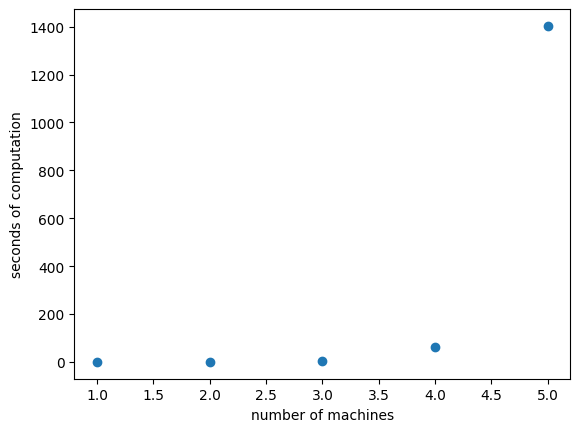

PyObject Text(24.0, 0.5, 'seconds of computation')

In [54]:
plot(M, computing_times, marker="o", linestyle="none")
xlabel("number of machines")
ylabel("seconds of computation")

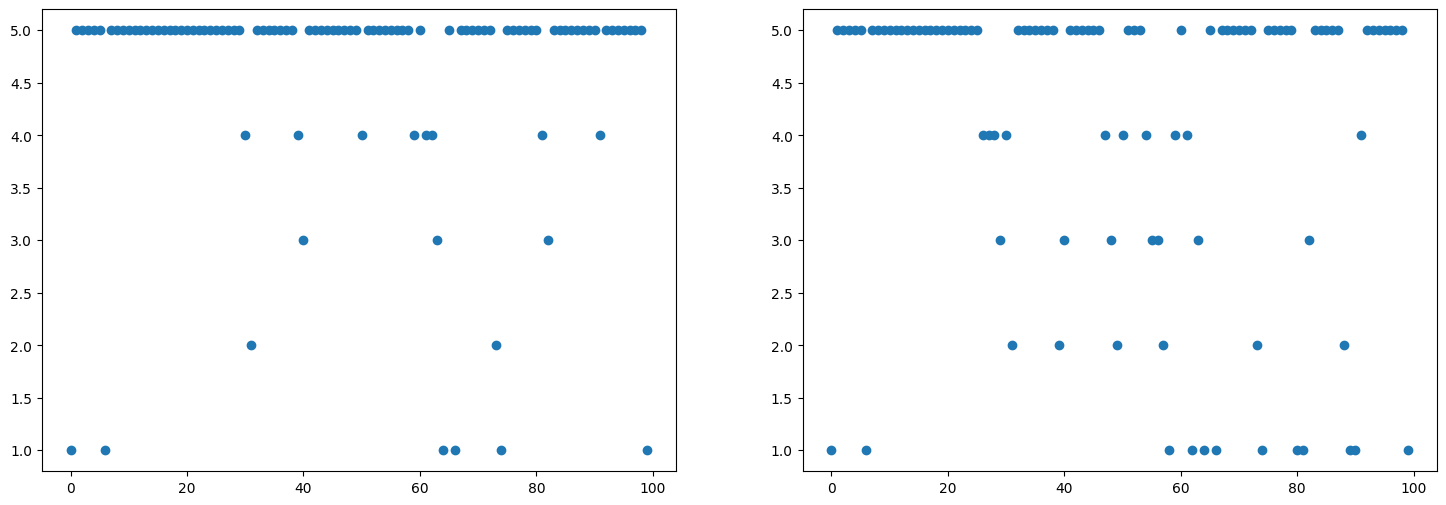

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcde4cd7280>

In [39]:
fig, ax = subplots(1,2,figsize=(18,6))
ax[1].plot(map(x->x[1], opt_actions), marker="o", linestyle="none")
ax[2].plot(map(x->x[2], opt_actions), marker="o", linestyle="none")

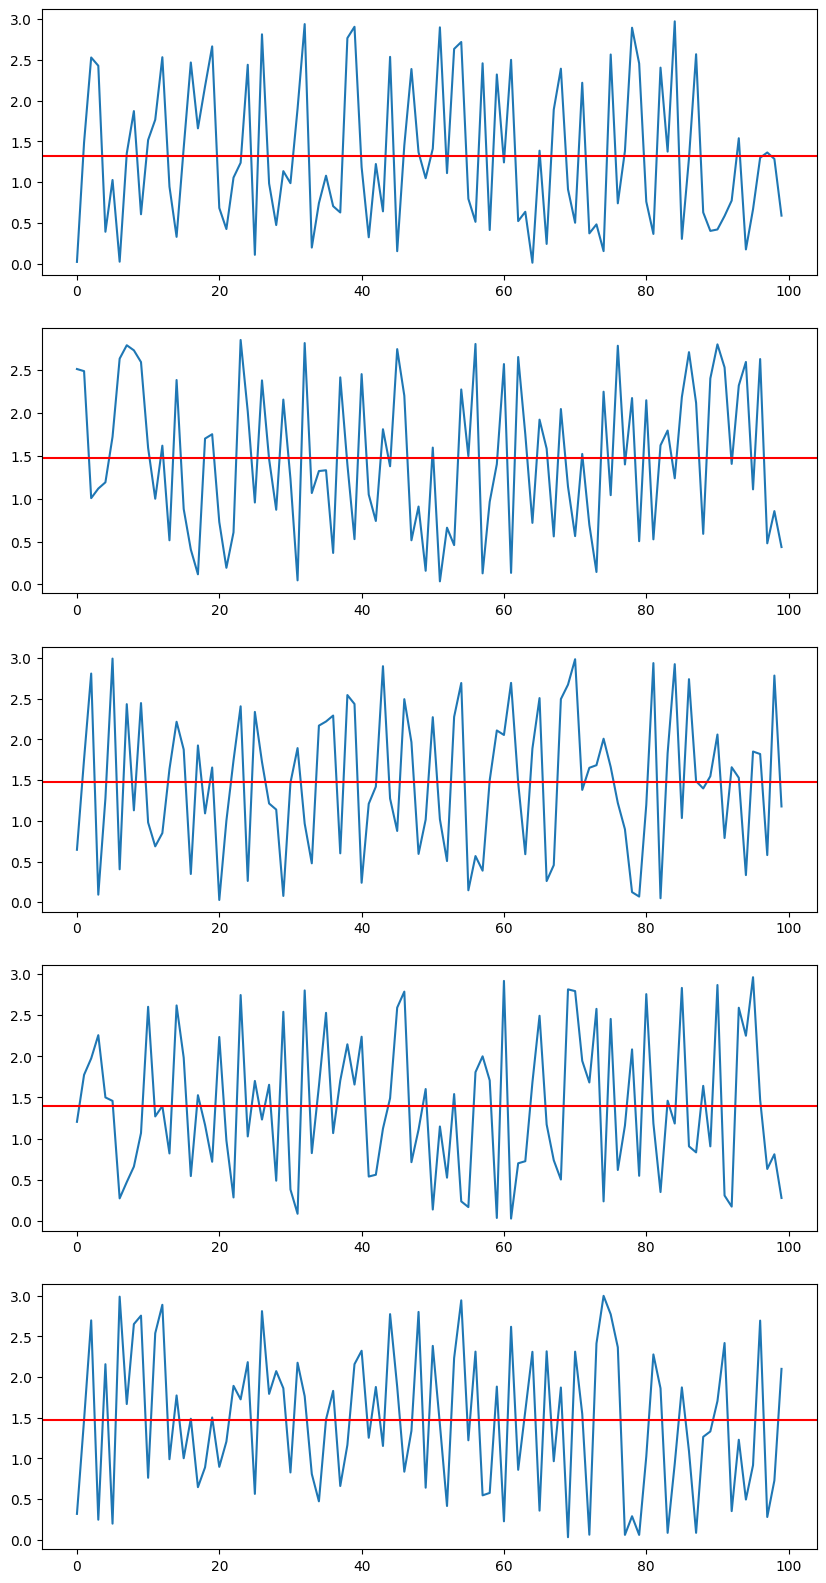

In [45]:
fig, ax = subplots(5,1, figsize=(10,20))
for i in 1:size(h,2)
    ax[i].plot(h[:,i])
    ax[i].axhline(mean(h[:,i]), color="red")
end